# Asthma Disease Clustering

 ## Asthma Symptoms and Their Meanings

- **Tiredness:** Tiredness may not be a direct symptom of asthma, but it can be a secondary effect. People with asthma may feel tired due to the effort required to breathe when experiencing symptoms like difficulty in breathing.

- **Dry-Cough:** A dry cough is a common symptom of asthma. It can be triggered or worsened by asthma-related inflammation and irritation of the airways.

- **Difficulty-in-Breathing:** This is a classic and hallmark symptom of asthma. Asthma is characterized by the narrowing of the airways, which leads to difficulty in breathing.

- **Sore-Throat:** Sore throat is not typically a primary symptom of asthma. However, individuals with asthma may experience a sore throat if they are coughing frequently due to their asthma symptoms.

- **None_Symptom and None_Experiencing:** These columns suggest that some individuals in the dataset are not experiencing any of the listed symptoms, which is possible. Asthma symptoms can vary from person to person, and some individuals may have asthma but not experience symptoms all the time.

- **Pains:** "Pains" is a bit generic, and it could refer to different types of pain. It's not a classic symptom of asthma, but individuals with asthma may experience chest discomfort or chest tightness during asthma attacks.

- **Nasal-Congestion and Runny-Nose:** Nasal congestion and a runny nose are not typical symptoms of asthma itself. However, they may be present in individuals with allergic asthma, where allergies trigger asthma symptoms.

- **Age_0-9 to Age_60+:** Asthma can affect individuals of all ages. Generally, asthma symptoms can vary in severity and frequency across different age groups. Children and the elderly may have different asthma symptom profiles.

- **Gender_Female and Gender_Male:** Asthma can affect individuals of any gender. Gender may not directly cause asthma symptoms, but it can influence how asthma is managed and the prevalence of asthma in different populations.

- **Severity_Mild, Severity_Moderate, and Severity_None:** These columns suggest different levels of severity for asthma. Asthma can indeed range from mild to moderate to severe, depending on how well it is controlled and the individual's response to treatment. The presence of these severity levels indicates the varying impact of asthma symptoms on different individuals.

It's important to note that asthma is a complex condition, and individual experiences can vary widely. The presence or absence of specific symptoms and their severity can depend on genetic factors, environmental triggers, and how well the condition is managed with medication and lifestyle adjustments. Additionally, this analysis is based on the data you've provided, and clinical assessments by healthcare professionals are essential for a definitive diagnosis and management of asthma.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
asthma_data = pd.read_csv('/kaggle/input/asthma-disease-prediction/processed-data.csv')

In [3]:
asthma_data.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [4]:
asthma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [5]:
asthma_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tiredness,316800.0,0.500000,0.500001,0.0,0.0,0.5,1.00,1.0
Dry-Cough,316800.0,0.562500,0.496079,0.0,0.0,1.0,1.00,1.0
Difficulty-in-Breathing,316800.0,0.500000,0.500001,0.0,0.0,0.5,1.00,1.0
Sore-Throat,316800.0,0.312500,0.463513,0.0,0.0,0.0,1.00,1.0
None_Sympton,316800.0,0.062500,0.242062,0.0,0.0,0.0,0.00,1.0
Pains,316800.0,0.363636,0.481046,0.0,0.0,0.0,1.00,1.0
Nasal-Congestion,316800.0,0.545455,0.497930,0.0,0.0,1.0,1.00,1.0
Runny-Nose,316800.0,0.545455,0.497930,0.0,0.0,1.0,1.00,1.0
None_Experiencing,316800.0,0.090909,0.287480,0.0,0.0,0.0,0.00,1.0
Age_0-9,316800.0,0.200000,0.400001,0.0,0.0,0.0,0.00,1.0


# We use Elbow Method to use K-Means Clustering more efficient.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

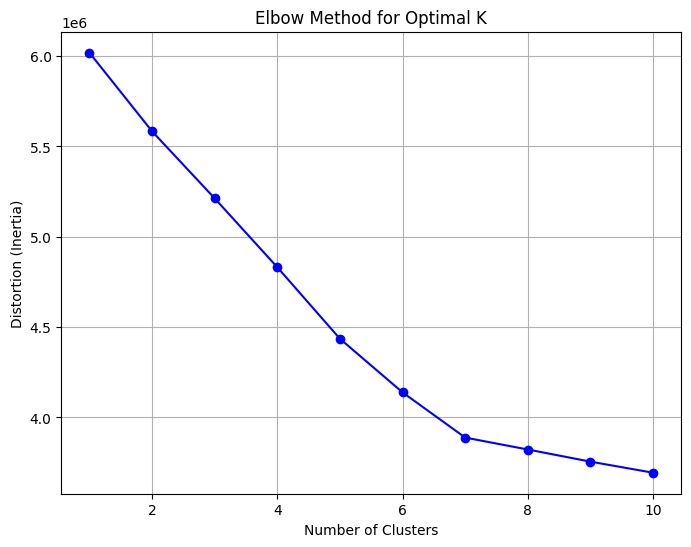

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming you have loaded your data into the 'asthma_data' DataFrame

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(asthma_data)

# Create a function to calculate the distortion (inertia) for a range of clusters
def calculate_distortion(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

# Specify the maximum number of clusters to consider
max_clusters = 10

# Calculate distortions (inertia) for different numbers of clusters
distortions = calculate_distortion(scaled_data, max_clusters)

# Plot the elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


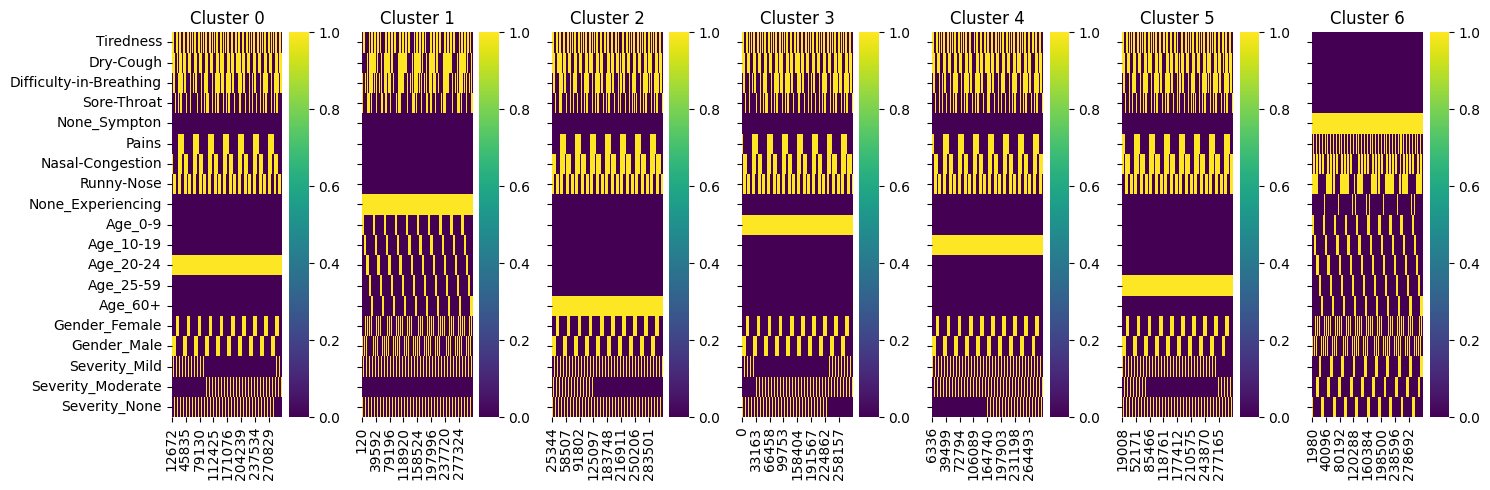

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
scaled_data = scaler.fit_transform(asthma_data)

# Perform K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels as a new column in the DataFrame
asthma_data['Cluster_Labels'] = cluster_labels
num_clusters = 7

# Create subplots for each cluster
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5), sharey=True)

# Iterate through clusters and create heatmaps
for cluster in range(num_clusters):
    cluster_data = asthma_data[asthma_data['Cluster_Labels'] == cluster].drop(columns=['Cluster_Labels'])
    sns.heatmap(cluster_data.T, cmap='viridis', ax=axes[cluster])
    axes[cluster].set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()

# Conclusion

- **Cluster 0:** Refers to the age range of 20-24. They are exhibit symptoms as well.

- **Cluster 1:** Seems to be related to influenza or a cold. Further domain knowledge is needed to inspect it in detail.

- **Cluster 2:** Seems to refer to the age range of 60 and older. They are  exhibit symptoms, and generally have mild or none asthma severity.

- **Cluster 3:** Refers to the age range of 0-9. They have a balanced gender distribution, exhibit symptoms, and generally have moderate or none asthma severity.

- **Cluster 4:** Refers to the age range of 10-19. They have a balanced gender distribution, exhibit symptoms, and have moderate or mild asthma severity.

- **Cluster 5:** Refers to the age range of 25-59. They have a balanced gender distribution, exhibit symptoms, and generally have mild or none asthma severity.

- **Cluster 6:** Seems to be related to influenza. The features are generally balanced.


<Axes: ylabel='Feature Name'>

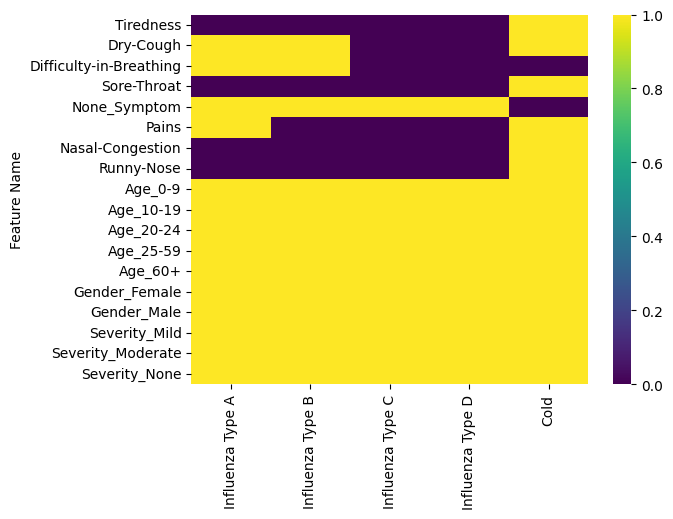

In [8]:
data = {
    'Feature Name': [
        'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
        'None_Symptom', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
        'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+',
        'Gender_Female', 'Gender_Male', 'Severity_Mild', 'Severity_Moderate', 'Severity_None'
    ],
    'Influenza Type A': [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Influenza Type B': [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Influenza Type C': [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Influenza Type D': [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Cold': [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

# Create the DataFrame
diseases = pd.DataFrame(data)

# Set 'Feature Name' column as the index
diseases.set_index('Feature Name', inplace=True)

# Display the DataFrame
sns.heatmap(diseases,cmap='viridis')


In [9]:
def asthma_detector(label):
    labels = [0,2,3,4,5]
    if label not in labels:
        return 0
    else:
        return 1
asthma_data['Asthma'] = asthma_data['Cluster_Labels'].apply(asthma_detector)
asthma_data.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Cluster_Labels,Asthma
0,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,1,1,0,0,3,1
1,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,1,1,0,0,3,1
2,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,1,1,0,0,3,1
3,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,1,0,1,0,3,1
4,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,1,0,1,0,3,1


# We have clustered the people whether or not they are asthma. Thank you for your interest in my project.